#<font color='red'>***ESTADISTICA RAPTOR (Robust Algorithm Player Tracking On/Off Ratings) DE JUGADORES DE LA NBA***</font>

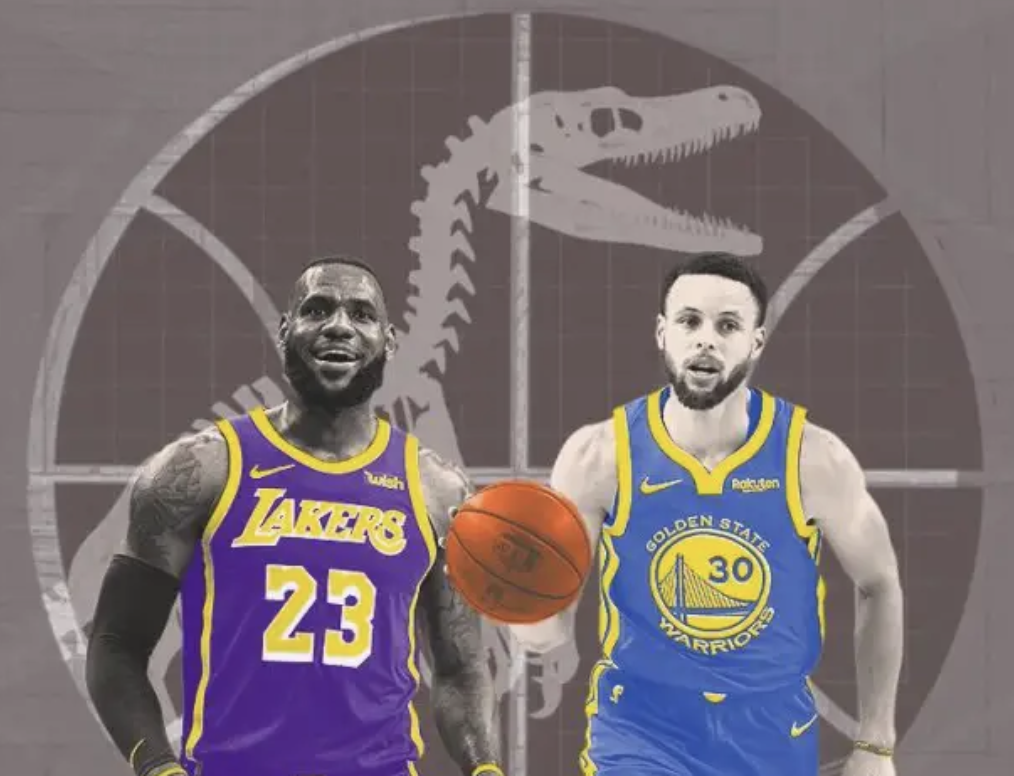

In [1]:
import pandas as pd
import numpy as np
!pip install -q pandasql
import sqlite3
from pandasql import sqldf
! pip install -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px
import pandas_profiling

  Preparing metadata (setup.py) ... done
     / 22.6 MB 19.5 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 7.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


Ejemplo de publicacion actual de estadistica del equipo Toronto Raptors:

<https://ar.global.nba.com/teams/stats/raptors/>

##1) **OBJETIVO:** PREDECIR GRUPOS DE JUGADORES DETERMINADOS DE ACUERDO A UN PATRON DE COMPORTAMIENTO.
ESTE LISTADO DE JUGADORES SERA IMPORTANTE PARA LOS CLUBES, QUIENES EN LA PROXIMA TEMPORADA ABRIRAN LA COMPRA-VENTA DE JUGADORES, Y PODREMOS VER QUIENES SERAN LOS MEJORES DE CADA GRUPO.

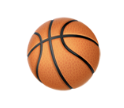
##2) BASE DE DATOS DE ESTADISTICA RAPTOR DE JUGADORES DE LA NBA 


In [ ]:
pd.set_option('precision', 2)

OptionError: ignored

In [2]:
from google.colab import drive
drive.mount('/content/drive')
dfR = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Raptor por Jugador.xlsx')

dfR

Mounted at /content/drive


Nombre  Nombre_id  Periodo  Ranking  Min_ Jugados  \
0      Alaa Abdelnaby  abdelal01     1991      640           303   
1      Alaa Abdelnaby  abdelal01     1992     1998           959   
2      Alaa Abdelnaby  abdelal01     1993     2754          1379   
3      Alaa Abdelnaby  abdelal01     1994      320           159   
4      Alaa Abdelnaby  abdelal01     1995      984           506   
...               ...        ...      ...      ...           ...   
19154     Ivica Zubac  zubaciv01     2018      871           410   
19155     Ivica Zubac  zubaciv01     2019     2345          1079   
19156     Ivica Zubac  zubaciv01     2020     3447          1646   
19157     Ivica Zubac  zubaciv01     2021     3908          1910   
19158     Ivica Zubac  zubaciv01     2022     3786          1852   

       Raptor Ofensivo  Raptor Defensivo  Raptor Total  Victoria Total  \
0                   39                51            90              61   
1                   25                19            44             780   
2                   23                20            43             122   
3                   61                27            88              50   
4                   38                12            50              61   
...                ...               ...           ...             ...   
19154               29               268           297             531   
19155               23               181           204             213   
19156              109               354           463             622   
19157                0               252           252             370   
19158                0                 0             0             262   

       Victoria Periodo  Victoria Playoffs  Ataque Ofensivo  Ataque Defensivo  \
0                    22                 39               39                16   
1                   703                 77               24                72   
2                    84                 38               23                20   
3                    50                  0               58                35   
4                    61                  0               37                10   
...                 ...                ...              ...               ...   
19154               531                  0               26               752   
19155               111                102               28               115   
19156               502                120               31               333   
19157               370                  0                0               228   
19158               262                  0               11               175   

       Ataque Total  Ritmo  
0                55    199  
1                96    485  
2                43    488  
3                93    511  
4                47    154  
...             ...    ...  
19154           778    311  
19155           143    770  
19156           364     41  
19157           228      0  
19158           186      0  

[19159 rows x 15 columns]

####Tipo de Datos

In [3]:
dfR.dtypes

Nombre               object
Nombre_id            object
Periodo               int64
Ranking               int64
Min_ Jugados          int64
Raptor Ofensivo       int64
Raptor Defensivo      int64
Raptor Total          int64
Victoria Total        int64
Victoria Periodo      int64
Victoria Playoffs     int64
Ataque Ofensivo       int64
Ataque Defensivo      int64
Ataque Total          int64
Ritmo                 int64
dtype: object

##*3*) DEFINICION DE LAS VARIABLES
**Raptor Ofensivo**: cantidad de puntos que produce un jugador cada 100 posesiones ofensivas
**Raptor Defensivo**: cantidad de puntos que produce un jugador cada 100 posesiones defensivas
**Raptor Total**: suma de las 2 anteriores.
**Victorias Playoffs**: cantidad de victorias en los juegos playoffs
**Victorias Periodo**: cantidad de victorias en el periodo indicado
**Victorias Total**: suma de las 2 variables anteriores
**Ataque Ofensivo**: cantidad de puntos que produce un jugador cada 100 ataques.
**Ataque Defensivo**: cantidad de puntos que produce un jugador cada 100 posesiones cuando defiende.
**Ataque Total**: suma de las 2 anteriores.
**Ritmo**: numero de posesiones de un jugador a lo largo de 48 min.


##4) CHEQUEO DE LOS DATOS

####Identificar Valores Nulos

In [4]:
dfR.isnull().sum()

Nombre               0
Nombre_id            0
Periodo              0
Ranking              0
Min_ Jugados         0
Raptor Ofensivo      0
Raptor Defensivo     0
Raptor Total         0
Victoria Total       0
Victoria Periodo     0
Victoria Playoffs    0
Ataque Ofensivo      0
Ataque Defensivo     0
Ataque Total         0
Ritmo                0
dtype: int64

El dataframe no posee valores nulos

####Chequear Valores Duplicados

In [5]:
dfR.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19154    False
19155    False
19156    False
19157    False
19158    False
Length: 19159, dtype: bool

In [6]:
print(dfR.shape)
dfR= dfR.drop_duplicates()
print(dfR.shape)

(19159, 15)
(19159, 15)


No se encuentran valores duplicados

In [7]:
pysqldf = lambda q: sqldf(q, globals())

####Agrupo los valores por jugador calculando el promedio de las 4 variables mas relevantes para el analisis

In [8]:
df1 = dfR.groupby(['Nombre'])[['Raptor Total','Victoria Total','Ataque Total','Ritmo']].mean() 
df1.style.highlight_max(color='green').highlight_min(color='pink')


####Importo las librerias con las que voy a trabajar

In [9]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats


##5) ANALISIS ESTADISTICO DEL DATASET

In [10]:
df1.describe().round()

Raptor Total  Victoria Total  Ataque Total   Ritmo
count        3571.0          3571.0        3571.0  3571.0
mean          246.0           277.0         225.0   258.0
std           194.0           230.0         188.0   202.0
min             0.0             0.0           0.0     0.0
25%            86.0            64.0          76.0    97.0
50%           200.0           242.0         160.0   223.0
75%           355.0           442.0         335.0   374.0
max          1560.0          1747.0        1667.0   998.0

In [11]:
profile = pandas_profiling.ProfileReport(df1)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

####Correlacion de las variables

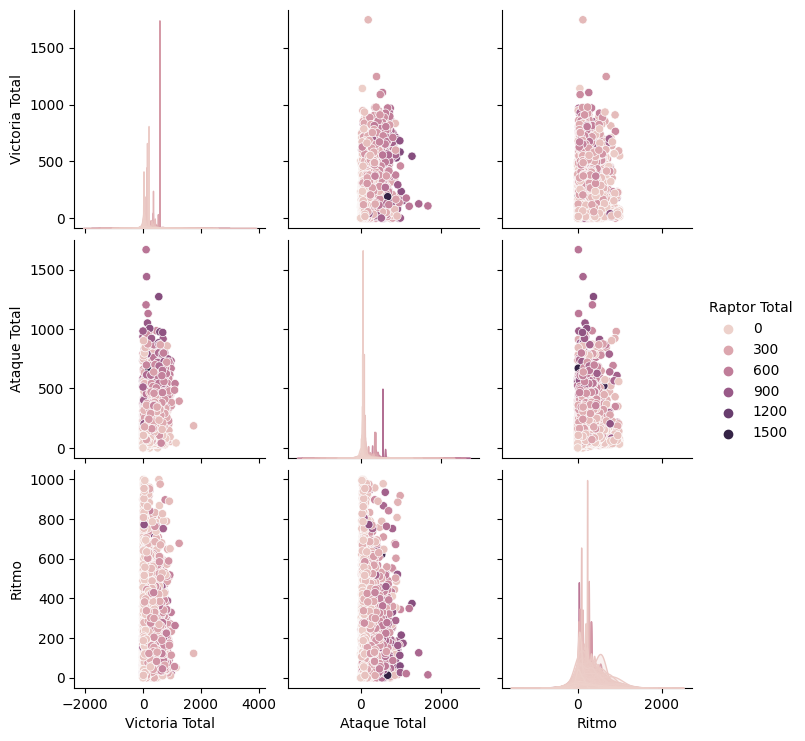

In [12]:
sns.pairplot(data=df1,aspect=.95,hue='Raptor Total')
plt.show()

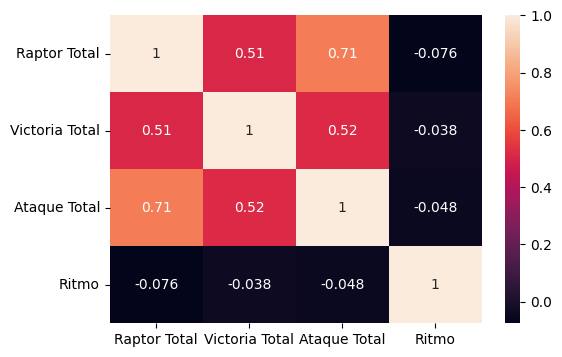

In [13]:
plt.figure(figsize=(6,4)) 
sns.heatmap(df1.corr(), annot=True)
plt.show()

De estos grafico de correlacion se observa que el raptor total tiene una correlacion positiva con la victoria total y el ataque total.

####Visualizacion de outliers en el diagrama de caja y bigotes

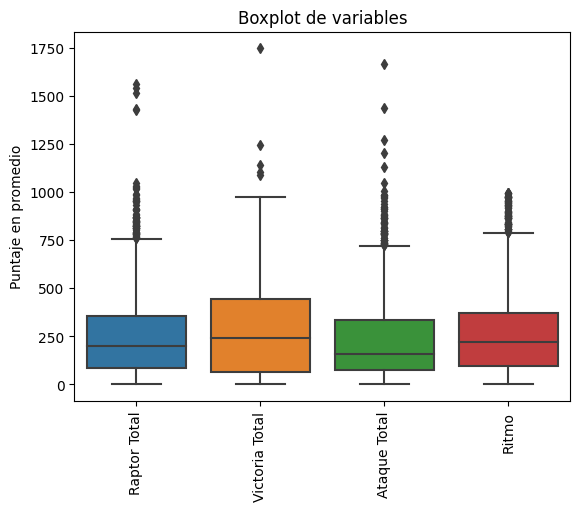

In [14]:
ax=sns.boxplot(data=df1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Boxplot de variables')
ax.set_ylabel('Puntaje en promedio')
plt.show()

####Renombro las columnas

In [15]:
df1.columns

Index(['Raptor Total', 'Victoria Total', 'Ataque Total', 'Ritmo'], dtype='object')

In [16]:
df1.columns = ['RT' , 'VT', 'AT' , 'R']
df1.columns

Index(['RT', 'VT', 'AT', 'R'], dtype='object')

####Calculo de Outliers

In [17]:
q1 = np.quantile(df1.RT, 0.25) 
q3 = np.quantile(df1.RT, 0.75) 
 
iqr = q3-q1 
 
upper_bound = q3+(1.5*iqr) 
lower_bound = q1-(1.5*iqr) 

promedio = df1.RT.mean()

print('valor maximo:', upper_bound)
print('valor minimo:',lower_bound)
print('Promedio:',promedio)

valor maximo: 757.9583333333333
valor minimo: -317.17499999999995
Promedio: 246.088373608364


In [18]:
q1 = np.quantile(df1.VT, 0.25) 
q3 = np.quantile(df1.VT, 0.75) 
 
iqr = q3-q1 
 
upper_bound = q3+(1.5*iqr) 
lower_bound = q1-(1.5*iqr) 

promedio = df1.VT.mean()

print('valor maximo:', upper_bound)
print('valor minimo:',lower_bound)
print('Promedio:',promedio)

valor maximo: 1010.5
valor minimo: -504.1666666666667
Promedio: 277.25210877545453


In [19]:
q1 = np.quantile(df1.AT, 0.25) 
q3 = np.quantile(df1.AT, 0.75) 
 
iqr = q3-q1 
 
upper_bound = q3+(1.5*iqr) 
lower_bound = q1-(1.5*iqr) 

promedio = df1.AT.mean()

print('valor maximo:', upper_bound)
print('valor minimo:',lower_bound)
print('Promedio:',promedio)

valor maximo: 722.217787114846
valor minimo: -311.1211484593838
Promedio: 225.09175287063107


In [20]:
q1 = np.quantile(df1.R, 0.25) 
q3 = np.quantile(df1.R, 0.75) 
 
iqr = q3-q1 
 
upper_bound = q3+(1.5*iqr) 
lower_bound = q1-(1.5*iqr) 

promedio = df1.R.mean()

print('valor maximo:', upper_bound)
print('valor minimo:',lower_bound)
print('Promedio:',promedio)

valor maximo: 790.7128496503497
valor minimo: -319.92141608391603
Promedio: 258.1326276139099


####Quito los outliers del dataframe

In [21]:
df1.drop(df1[(df1['RT'] <=757.9583333333333) & (df1['VT'] <= 1010.5) & (df1['AT'] <= 722.217787114846)& (df1['R'] <= 790.7128496503497)].index, inplace=True)
df1.style.background_gradient(cmap='BuGn')


In [22]:
len(df1)

194

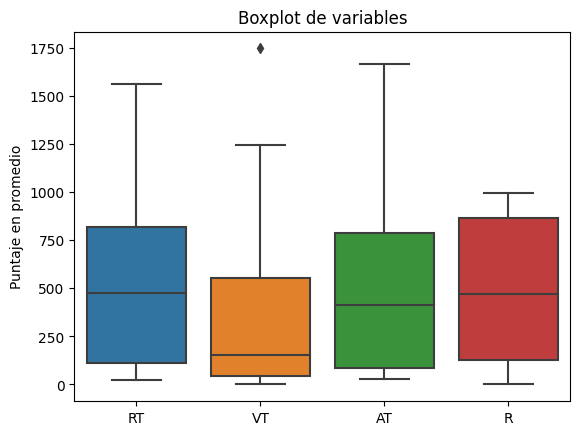

In [23]:
ax=sns.boxplot(data=df1)
ax.set_title('Boxplot de variables')
ax.set_ylabel('Puntaje en promedio')
plt.show()

Grafico el mismo grafico con la libreria Plotly

In [24]:
px.box(df1)

##6) **HIPOTESIS A VERIFICAR**

####HIPOTESIS: los 10 jugadores con Raptor total mas alto son los que tienen mayor victoria total

In [25]:
dtop10 = df1.nlargest(10, ['RT']) 
dtop10.style.highlight_max(color='green').highlight_min(color='pink')


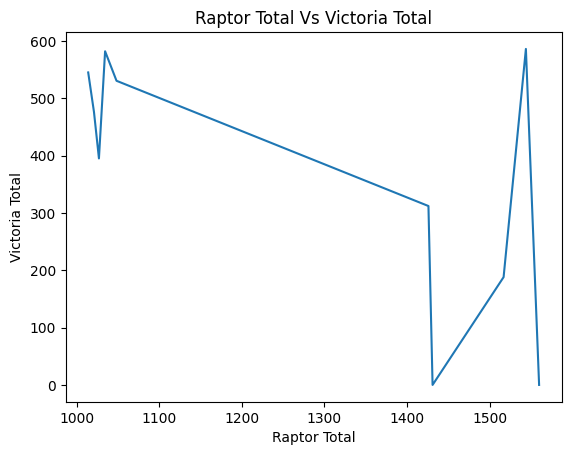

In [26]:
sns.lineplot(x= "RT", y="VT", data = dtop10)
plt.title('Raptor Total Vs Victoria Total')
plt.xlabel('Raptor Total')
plt.ylabel('Victoria Total')
plt.show()

Grafico las 4 variables con la libreria Plotly

In [27]:
px.line(dtop10)

Vemos que la hipotesis no se cumple ya que jugadores con raptor alto no tienen la victoria total mas alta

####HIPOTESIS: los jugadores con Raptor total mas alto tienen mayor cantidad de ataques totales

In [28]:
import plotly.express as px

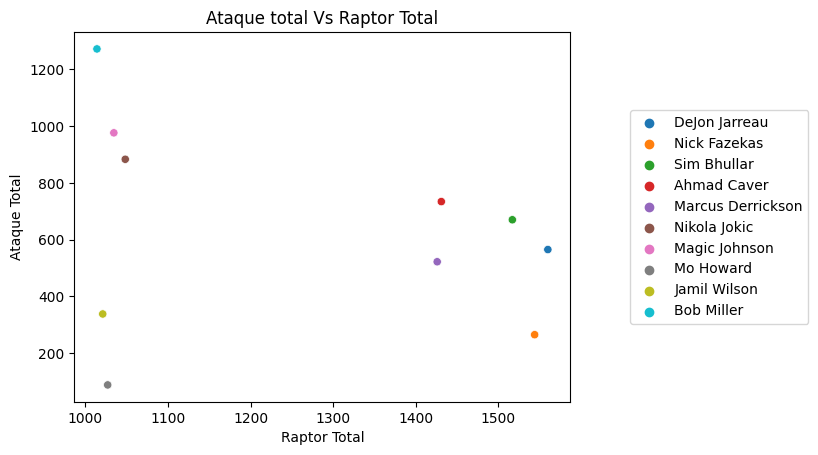

In [29]:
sns.scatterplot(data=dtop10, x="RT", y="AT", hue="Nombre")
plt.title('Ataque total Vs Raptor Total')
plt.xlabel('Raptor Total')
plt.ylabel('Ataque Total')

plt.legend(loc = 10, bbox_to_anchor = (1.3,0.5))

plt.show()


In [30]:
import plotly.express as px

Grafico con la libreria Plotly

In [31]:
px.scatter(dtop10, x='RT', y='AT')

No se cumple la hipotesis porque los jugadores con el raptor total mas alto tienen el ataque total por debajo del maximo

##7) **APRENDIZAJE NO SUPERVISADO**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

#from sklearn.linear_model import LinearRegression


In [33]:
df1

RT     VT          AT           R
Nombre                                                       
Ahmad Caver        1431.000000    0.0  734.000000   21.000000
Al Fleming           52.000000   40.0   68.000000  832.000000
Alexander Johnson    78.000000   69.0   63.500000  863.500000
Alvin Heggs         269.000000  133.0  912.000000   16.000000
Angel Delgado       190.000000  333.0  839.000000   32.000000
...                        ...    ...         ...         ...
Will Cherry         956.000000   38.0  203.000000  771.000000
Yvon Joseph         287.000000  599.0  867.000000  502.000000
Zach Lofton         140.000000   18.0  902.000000  807.000000
Zarko Cabarkapa     108.333333  152.0   63.666667  861.666667
Zoran Dragic        116.000000   34.0  104.000000  953.000000

[194 rows x 4 columns]

In [34]:
df2 = round(df1, 2)
df2

RT     VT      AT       R
Nombre                                           
Ahmad Caver        1431.00    0.0  734.00   21.00
Al Fleming           52.00   40.0   68.00  832.00
Alexander Johnson    78.00   69.0   63.50  863.50
Alvin Heggs         269.00  133.0  912.00   16.00
Angel Delgado       190.00  333.0  839.00   32.00
...                    ...    ...     ...     ...
Will Cherry         956.00   38.0  203.00  771.00
Yvon Joseph         287.00  599.0  867.00  502.00
Zach Lofton         140.00   18.0  902.00  807.00
Zarko Cabarkapa     108.33  152.0   63.67  861.67
Zoran Dragic        116.00   34.0  104.00  953.00

[194 rows x 4 columns]

In [35]:
df2.isnull().sum()

RT    0
VT    0
AT    0
R     0
dtype: int64

In [36]:
df2.dtypes

RT    float64
VT    float64
AT    float64
R     float64
dtype: object

In [37]:
X_kmeans = df2
X_kmeans.head()

RT     VT     AT      R
Nombre                                        
Ahmad Caver        1431.0    0.0  734.0   21.0
Al Fleming           52.0   40.0   68.0  832.0
Alexander Johnson    78.0   69.0   63.5  863.5
Alvin Heggs         269.0  133.0  912.0   16.0
Angel Delgado       190.0  333.0  839.0   32.0

####Escalamiento de los valores

In [38]:
scaler = Normalizer()
scaler.fit(X_kmeans)

X_scaled = scaler.transform(X_kmeans)
dfescalado=pd.DataFrame(X_scaled,columns=X_kmeans.columns,index=X_kmeans.index)
dfescalado

RT        VT        AT         R
Nombre                                                   
Ahmad Caver        0.889703  0.000000  0.456353  0.013056
Al Fleming         0.062101  0.047770  0.081209  0.993613
Alexander Johnson  0.089442  0.079122  0.072815  0.990171
Alvin Heggs        0.280140  0.138508  0.949768  0.016663
Angel Delgado      0.205850  0.360779  0.908990  0.034669
...                     ...       ...       ...       ...
Will Cherry        0.767623  0.030512  0.162999  0.619076
Yvon Joseph        0.238764  0.498326  0.721283  0.417629
Zach Lofton        0.114894  0.014772  0.740246  0.662282
Zarko Cabarkapa    0.122552  0.171955  0.072029  0.974794
Zoran Dragic       0.120052  0.035188  0.107633  0.986288

[194 rows x 4 columns]

In [39]:
dfescalado.isnull().sum()

RT    0
VT    0
AT    0
R     0
dtype: int64

In [40]:
dfescalado.dtypes

RT    float64
VT    float64
AT    float64
R     float64
dtype: object

In [41]:
np.any(np.isnan(dfescalado))

False

In [42]:
np.all(np.isfinite(dfescalado))

True

In [43]:
import math

####Curva del codo para determinar el numero de clusters

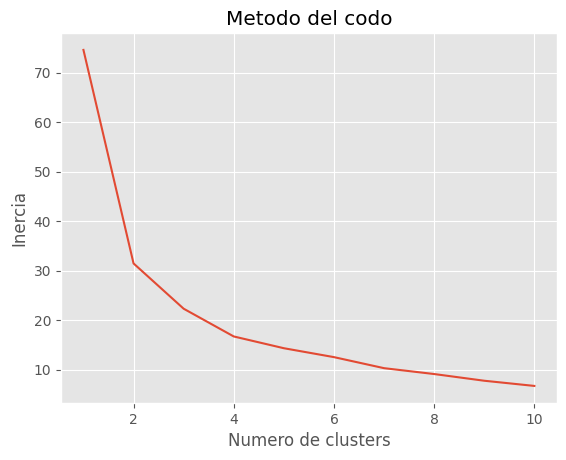

In [44]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfescalado)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

A partir del 4to cluster la reducción en la suma total de cuadrados internos parece estabilizarse, indicando que K = 4 es una buena opción. Elijo K = 4

####Indice de Silhouette

Verifico mediante el indice de Silhouette si el numero de cluster elegido es correcto

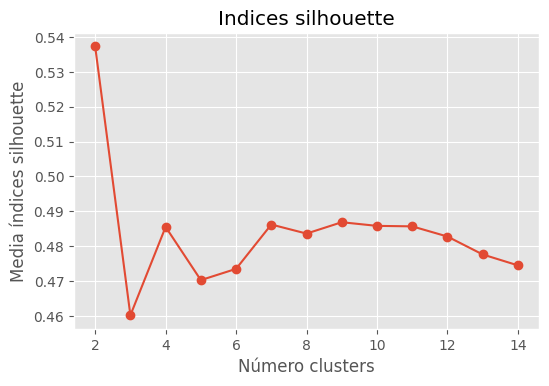

In [45]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(dfescalado)
    silhouette_avg = silhouette_score(dfescalado, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Indices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

El valor medio de los índices silhouette se maximiza con 2 clusters

####Silhouette Score

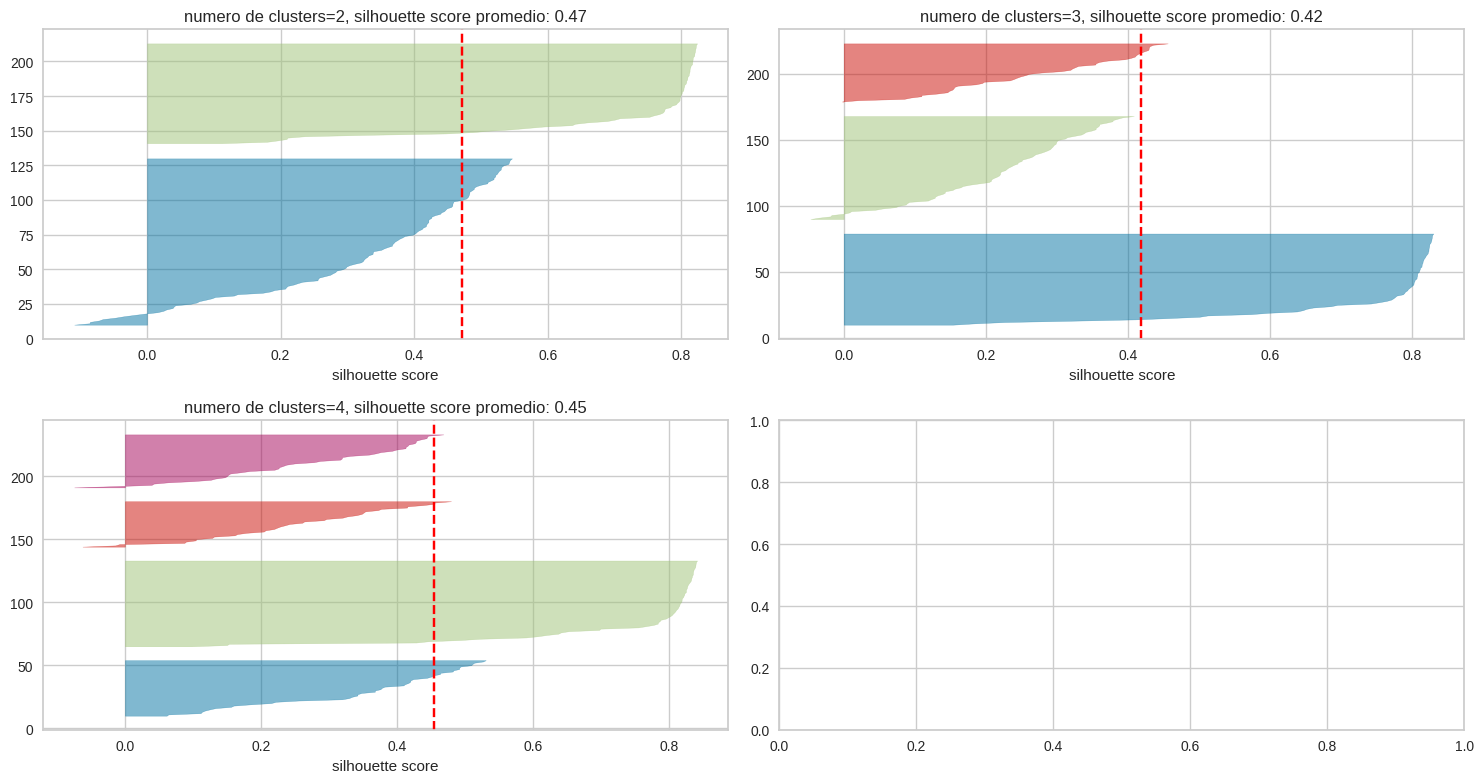

In [93]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4]: 

    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42) 
    labels=km.fit_predict(X)
    score=metrics.silhouette_score(X, labels, metric='euclidean')

    eje1, eje2 = divmod(i, 2) 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[eje1-1][eje2])

    visualizer.fit(X) 
    
    ax[eje1-1][eje2].set_title(f'numero de clusters={i}, silhouette score promedio: {round(score,2)}')
    ax[eje1-1][eje2].set_xlabel("silhouette score")
    plt.tight_layout()

A traves de las graficas del Silhouette Score vemos que en la segunda grafica los grosores de cada cluster son mas parejos, por lo que lo optimo son 3 clusters

####Dendograma

Aplicando hierarchical clustering aglomerativo vemos en forma grafica cuales son las agrupaciones de datos segun la distancia euclideana y determinamos el numero de clusters

In [46]:
modelo_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=dfescalado)

modelo_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=dfescalado)

modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X=dfescalado)

AgglomerativeClustering(affinity='euclidean', distance_threshold=0,
                        n_clusters=None)

In [47]:
def plot_dendrogram(model, **kwargs):
  
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

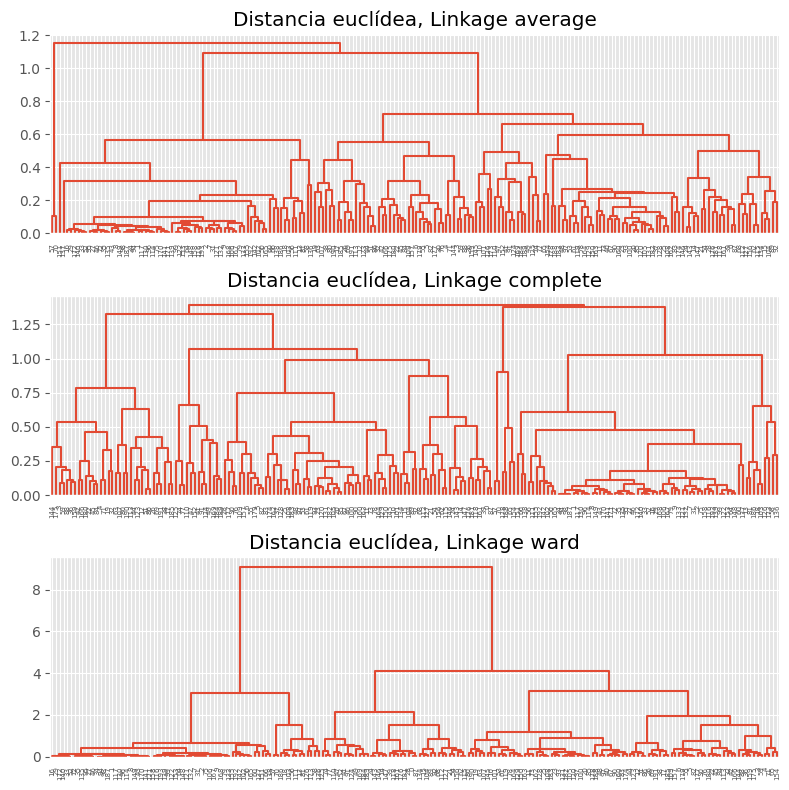

In [48]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();

Linkage complete (distancia maxima o similitud minima)

Linkage average (distancia o similitud promedio)

Linkage ward (distancia menor o similitud maxima)

Segun estos 3 dendogramas podriamos tener 2, 3 y 4 clusters, pero vemos que en el dendogra de maxima similitud se distinguen 3 clusters, por lo que se confirma que el numero optimo de clusters es 3

####Entreno el Algoritmo

In [94]:
kmeans = KMeans(n_clusters=3, random_state=3)
kmeans.fit(dfescalado)

labels = kmeans.predict(dfescalado)
centroids = kmeans.cluster_centers_
centroids

array([[0.12424329, 0.1287155 , 0.10865432, 0.94944748],
       [0.69135901, 0.38602296, 0.41370704, 0.19487492],
       [0.35097527, 0.1674053 , 0.80992619, 0.26576307]])

In [95]:
df3 = df2.reset_index()
df3

Nombre       RT     VT      AT       R
0          Ahmad Caver  1431.00    0.0  734.00   21.00
1           Al Fleming    52.00   40.0   68.00  832.00
2    Alexander Johnson    78.00   69.0   63.50  863.50
3          Alvin Heggs   269.00  133.0  912.00   16.00
4        Angel Delgado   190.00  333.0  839.00   32.00
..                 ...      ...    ...     ...     ...
189        Will Cherry   956.00   38.0  203.00  771.00
190        Yvon Joseph   287.00  599.0  867.00  502.00
191        Zach Lofton   140.00   18.0  902.00  807.00
192    Zarko Cabarkapa   108.33  152.0   63.67  861.67
193       Zoran Dragic   116.00   34.0  104.00  953.00

[194 rows x 5 columns]

In [96]:
Clusters = pd.DataFrame(labels)
Clusters

0
0    1
1    0
2    0
3    2
4    2
..  ..
189  1
190  2
191  2
192  0
193  0

[194 rows x 1 columns]

In [97]:
Clusters.columns=['Clusters']
Clusters.columns

Index(['Clusters'], dtype='object')

In [98]:
Clusters

Clusters
0           1
1           0
2           0
3           2
4           2
..        ...
189         1
190         2
191         2
192         0
193         0

[194 rows x 1 columns]

####Obtencion de Clusteres

In [99]:
dfunificado = pd.merge(df3, Clusters, how='left', on=None, left_on=None, right_on=None,
         left_index=True, right_index=True, sort=True)
dfunificado

Nombre       RT     VT      AT       R  Clusters
0          Ahmad Caver  1431.00    0.0  734.00   21.00         1
1           Al Fleming    52.00   40.0   68.00  832.00         0
2    Alexander Johnson    78.00   69.0   63.50  863.50         0
3          Alvin Heggs   269.00  133.0  912.00   16.00         2
4        Angel Delgado   190.00  333.0  839.00   32.00         2
..                 ...      ...    ...     ...     ...       ...
189        Will Cherry   956.00   38.0  203.00  771.00         1
190        Yvon Joseph   287.00  599.0  867.00  502.00         2
191        Zach Lofton   140.00   18.0  902.00  807.00         2
192    Zarko Cabarkapa   108.33  152.0   63.67  861.67         0
193       Zoran Dragic   116.00   34.0  104.00  953.00         0

[194 rows x 6 columns]

####Rand Index

In [110]:
dfunificado

Nombre       RT     VT      AT       R  Clusters
0          Ahmad Caver  1431.00    0.0  734.00   21.00         1
1           Al Fleming    52.00   40.0   68.00  832.00         0
2    Alexander Johnson    78.00   69.0   63.50  863.50         0
3          Alvin Heggs   269.00  133.0  912.00   16.00         2
4        Angel Delgado   190.00  333.0  839.00   32.00         2
..                 ...      ...    ...     ...     ...       ...
189        Will Cherry   956.00   38.0  203.00  771.00         1
190        Yvon Joseph   287.00  599.0  867.00  502.00         2
191        Zach Lofton   140.00   18.0  902.00  807.00         2
192    Zarko Cabarkapa   108.33  152.0   63.67  861.67         0
193       Zoran Dragic   116.00   34.0  104.00  953.00         0

[194 rows x 6 columns]

In [113]:
dff = dfunificado.drop('Nombre',axis=1)
dff

RT     VT      AT       R  Clusters
0    1431.00    0.0  734.00   21.00         1
1      52.00   40.0   68.00  832.00         0
2      78.00   69.0   63.50  863.50         0
3     269.00  133.0  912.00   16.00         2
4     190.00  333.0  839.00   32.00         2
..       ...    ...     ...     ...       ...
189   956.00   38.0  203.00  771.00         1
190   287.00  599.0  867.00  502.00         2
191   140.00   18.0  902.00  807.00         2
192   108.33  152.0   63.67  861.67         0
193   116.00   34.0  104.00  953.00         0

[194 rows x 5 columns]

In [114]:
dff['Clusters'].value_counts()

1    80
0    70
2    44
Name: Clusters, dtype: int64

In [115]:
Y = dff['Clusters'] 
X = dff.drop('Clusters',axis=1)

In [116]:
k_means = KMeans(n_clusters = 3)
k_means.fit(dff)

KMeans(n_clusters=3)

In [117]:
metrics.rand_score(Y,k_means.labels_)

0.9869665081993483

In [118]:
metrics.adjusted_rand_score(Y,k_means.labels_)

0.9712912130041405

Estas metricas cercanas a 1 indican que dos métodos de agrupación concuerdan perfectamente en la agrupación de cada par de elementos.

##8) RESULTADOS FINALES

####Grafico los clusters

In [55]:
import plotly as py
import plotly.graph_objs as go

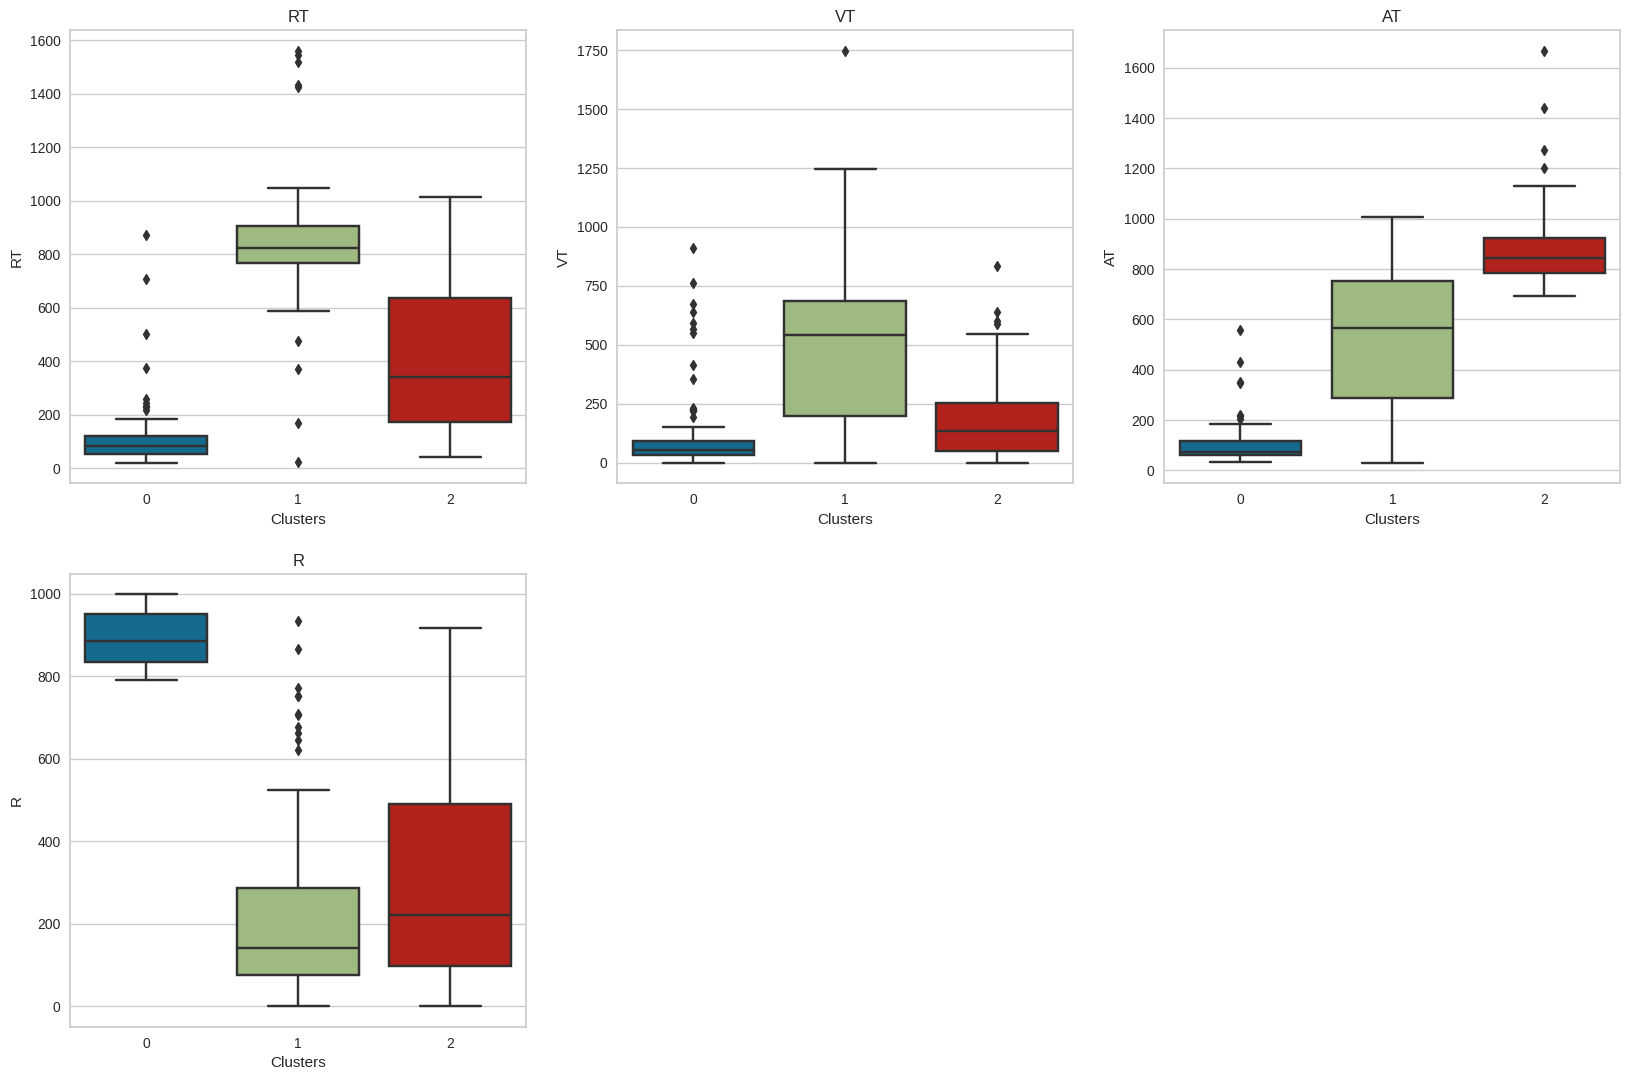

In [100]:
l=['RT', 'VT', 'AT', 'R']
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=dfunificado.Clusters,y=dfunificado[l[i]])
    plt.title(l[i])

plt.show()

In [119]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(x= dfunificado['RT'], y= dfunificado['VT'], z= dfunificado['AT'],
    mode='markers', marker=dict(color = dfunificado['Clusters'],size= 15,line=dict(color= dfunificado['Clusters'],width= 18),opacity=0.8))

layout = go.Layout(title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'RT'),
            yaxis = dict(title  = 'VT'),
            zaxis = dict(title  = 'AT'),
        )
)

fig = go.Figure(data=[trace1], layout=layout)
py.offline.iplot(fig)

##9) VALIDACION

Metodo del ARBOL DE DECISION

In [144]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt

In [145]:
dfescalado

RT        VT        AT         R
Nombre                                                   
Ahmad Caver        0.889703  0.000000  0.456353  0.013056
Al Fleming         0.062101  0.047770  0.081209  0.993613
Alexander Johnson  0.089442  0.079122  0.072815  0.990171
Alvin Heggs        0.280140  0.138508  0.949768  0.016663
Angel Delgado      0.205850  0.360779  0.908990  0.034669
...                     ...       ...       ...       ...
Will Cherry        0.767623  0.030512  0.162999  0.619076
Yvon Joseph        0.238764  0.498326  0.721283  0.417629
Zach Lofton        0.114894  0.014772  0.740246  0.662282
Zarko Cabarkapa    0.122552  0.171955  0.072029  0.974794
Zoran Dragic       0.120052  0.035188  0.107633  0.986288

[194 rows x 4 columns]

####Arbol de Decision

In [146]:
dfunificado

Nombre       RT     VT      AT       R  Clusters
0          Ahmad Caver  1431.00    0.0  734.00   21.00         1
1           Al Fleming    52.00   40.0   68.00  832.00         0
2    Alexander Johnson    78.00   69.0   63.50  863.50         0
3          Alvin Heggs   269.00  133.0  912.00   16.00         2
4        Angel Delgado   190.00  333.0  839.00   32.00         2
..                 ...      ...    ...     ...     ...       ...
189        Will Cherry   956.00   38.0  203.00  771.00         1
190        Yvon Joseph   287.00  599.0  867.00  502.00         2
191        Zach Lofton   140.00   18.0  902.00  807.00         2
192    Zarko Cabarkapa   108.33  152.0   63.67  861.67         0
193       Zoran Dragic   116.00   34.0  104.00  953.00         0

[194 rows x 6 columns]

In [147]:
dfinal = dfunificado.drop (columns = ['Nombre']) 
dfinal

RT     VT      AT       R  Clusters
0    1431.00    0.0  734.00   21.00         1
1      52.00   40.0   68.00  832.00         0
2      78.00   69.0   63.50  863.50         0
3     269.00  133.0  912.00   16.00         2
4     190.00  333.0  839.00   32.00         2
..       ...    ...     ...     ...       ...
189   956.00   38.0  203.00  771.00         1
190   287.00  599.0  867.00  502.00         2
191   140.00   18.0  902.00  807.00         2
192   108.33  152.0   63.67  861.67         0
193   116.00   34.0  104.00  953.00         0

[194 rows x 5 columns]

In [148]:
X = dfinal.drop("Clusters", axis=1)
y = dfinal.Clusters


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

In [150]:
y_train.value_counts()/len(y_train)

1    0.414815
0    0.362963
2    0.222222
Name: Clusters, dtype: float64

In [151]:
y_test.value_counts()/len(y_test)

1    0.406780
0    0.355932
2    0.237288
Name: Clusters, dtype: float64

In [152]:
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 42) 

In [153]:
dfunificado

Nombre       RT     VT      AT       R  Clusters
0          Ahmad Caver  1431.00    0.0  734.00   21.00         1
1           Al Fleming    52.00   40.0   68.00  832.00         0
2    Alexander Johnson    78.00   69.0   63.50  863.50         0
3          Alvin Heggs   269.00  133.0  912.00   16.00         2
4        Angel Delgado   190.00  333.0  839.00   32.00         2
..                 ...      ...    ...     ...     ...       ...
189        Will Cherry   956.00   38.0  203.00  771.00         1
190        Yvon Joseph   287.00  599.0  867.00  502.00         2
191        Zach Lofton   140.00   18.0  902.00  807.00         2
192    Zarko Cabarkapa   108.33  152.0   63.67  861.67         0
193       Zoran Dragic   116.00   34.0  104.00  953.00         0

[194 rows x 6 columns]

In [154]:
arbol_de_decision.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [155]:
y_pred = arbol_de_decision.predict(X_test)

In [156]:
y_pred

array([0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

In [157]:
y_test

33     0
22     2
167    0
174    1
107    2
101    1
102    0
188    1
36     2
132    0
73     1
64     0
0      1
86     2
184    0
24     1
7      0
142    0
168    0
138    0
43     0
68     1
171    0
186    0
2      0
47     1
84     2
3      2
5      2
146    1
100    1
96     0
108    1
116    0
59     2
72     0
37     1
115    1
178    1
75     0
185    2
90     1
30     2
53     1
127    1
125    2
12     2
150    1
120    1
60     0
165    0
190    2
152    1
160    1
141    0
76     2
109    1
78     1
25     1
Name: Clusters, dtype: int32

####Accuracy (porcentaje total de valores correctamente clasificados, tanto positivos como negativos)

In [158]:
accuracy_score(y_test,y_pred)

0.9322033898305084

####Matriz de Confusion

In [159]:
confusion_matrix(y_test, y_pred) 

array([[21,  0,  0],
       [ 0, 23,  1],
       [ 0,  3, 11]])

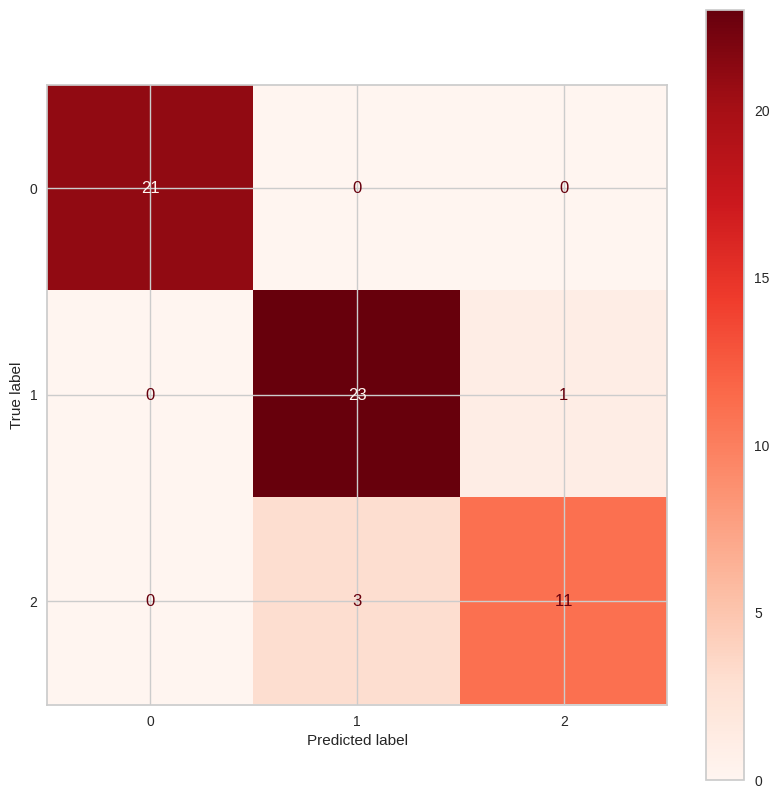

In [160]:
fig, ax = plt.subplots(figsize=(10,10))

cm = confusion_matrix(y_test, y_pred, labels=arbol_de_decision.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=arbol_de_decision.classes_)
disp.plot(ax=ax,cmap=plt.cm.Reds)
plt.show()

Podemos observar mediante la matriz de confusion que el modelo tuvo 4 errores, clasificando 1 elemento en cluster 2, cuando deberia clasificarse en el cluster 1 y 3 elementos en el cluster 1, cuando deberia clasificarse en el cluster 2.

####Precision (porcentaje de valores que se han clasificado como positivos son realmente positivos)

In [190]:
y_test.head()

33     0
22     2
167    0
174    1
107    2
Name: Clusters, dtype: int32

In [162]:
y_pred

array([0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

In [192]:
precision_score(y_test, y_pred)

ValueError: ignored

####Recall (verdaderos positivos correctamente clasificados)

In [164]:
recall_score(y_test, y_pred)

ValueError: ignored

####Valor F1 (combinacion de precision y recall)

In [165]:
f1_score(y_test, y_pred) 

ValueError: ignored

####Reporte de Metricas

In [170]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      0.96      0.92        24
           2       0.92      0.79      0.85        14

    accuracy                           0.93        59
   macro avg       0.93      0.91      0.92        59
weighted avg       0.93      0.93      0.93        59



####Curva ROC

In [171]:
arbol_de_decision.predict_proba(X_test)[0:10]

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [175]:
y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]
y_score1[0:10]

array([0., 0., 0., 1., 0., 1., 0., 1., 1., 0.])

In [176]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

ValueError: ignored

In [177]:
true_positive_rate1

array([0., 1., 1.])

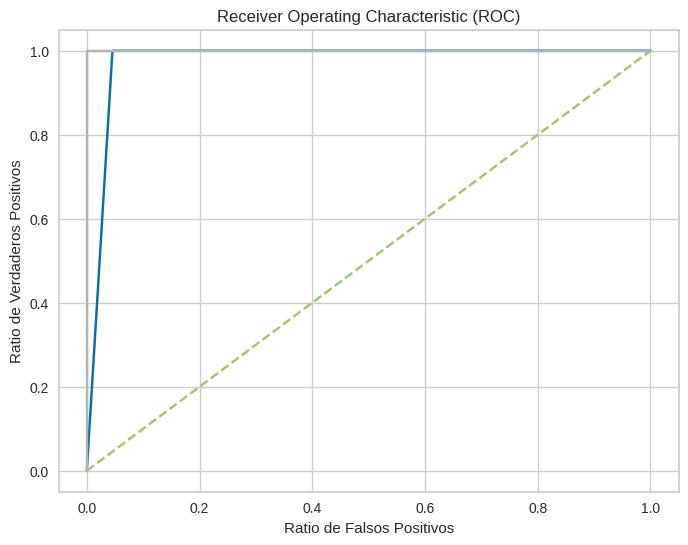

In [169]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Ratio de Verdaderos Positivos')
plt.xlabel('Ratio de Falsos Positivos')
plt.show()

In [178]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

ValueError: ignored

El arbol de decision tiene una efectividad del 97%, esto es que el 97% de los casos sabe diferenciar correctamente los grupos de clusters.

##10) CONCLUSIONES

######Los jugadores con mayor ritmo se encuentran agrupados en el CLUSTER 0 y muy por debajo de esos valores quedan el resto de las variables
######Los jugadores con el mayor puntaje de estadistica raptor (variable predominante) se encuentran agrupados en el CLUSTER 1, ademas tambien son jugadores con habilidades de atacante.


De estos resultados podemos concluir diciendo que segun las caracteristicas de los jugadores que requiera cada equipo, podra seleccionar entre los que se encuentren en cada grupo; por ejemplo si un equipo necesita jugadores mayormente atacantes, podra interesarse en los jugadores que integran el CLUSTER 1.

In [179]:
true_positive_rate1

array([0., 1., 1.])

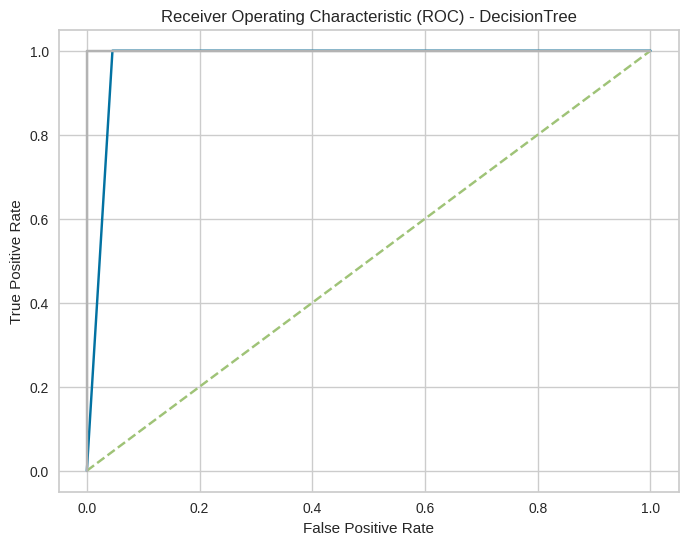

In [180]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic (ROC) - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [181]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

ValueError: ignored

##11) INSIGHTS

In [182]:
dfunificado


Nombre       RT     VT      AT       R  Clusters
0          Ahmad Caver  1431.00    0.0  734.00   21.00         1
1           Al Fleming    52.00   40.0   68.00  832.00         0
2    Alexander Johnson    78.00   69.0   63.50  863.50         0
3          Alvin Heggs   269.00  133.0  912.00   16.00         2
4        Angel Delgado   190.00  333.0  839.00   32.00         2
..                 ...      ...    ...     ...     ...       ...
189        Will Cherry   956.00   38.0  203.00  771.00         1
190        Yvon Joseph   287.00  599.0  867.00  502.00         2
191        Zach Lofton   140.00   18.0  902.00  807.00         2
192    Zarko Cabarkapa   108.33  152.0   63.67  861.67         0
193       Zoran Dragic   116.00   34.0  104.00  953.00         0

[194 rows x 6 columns]

In [183]:
Ccero = dfunificado[(dfunificado.Clusters==0)]
Ccero

Nombre      RT     VT      AT       R  Clusters
1           Al Fleming   52.00   40.0   68.00  832.00         0
2    Alexander Johnson   78.00   69.0   63.50  863.50         0
7          Art Collins   72.00   92.0   84.00  845.00         0
8           B.J. Tyler   51.00   10.0   60.00  836.00         0
9        Bernard Toone  144.00   74.0   72.00  991.00         0
..                 ...     ...    ...     ...     ...       ...
184      Walter Jordan  872.00   12.0   82.00  806.00         0
186      Wayne Radford  110.00  671.0   36.00  826.00         0
187    Wayne Sappleton   61.00   53.0   65.00  940.00         0
192    Zarko Cabarkapa  108.33  152.0   63.67  861.67         0
193       Zoran Dragic  116.00   34.0  104.00  953.00         0

[70 rows x 6 columns]

In [184]:
Ccerofiltro = Ccero.sort_values(by="R", ascending=False)
print (Ccerofiltro.head(5))

               Nombre     RT     VT    AT      R  Clusters
18   Carldell Johnson   79.0  548.0  59.0  998.0         0
95        Kim English   33.0   14.0  36.0  998.0         0
172         Tom Kropp   27.0   62.0  32.0  993.0         0
9       Bernard Toone  144.0   74.0  72.0  991.0         0
117    Maurice Carter   61.0   34.0  82.0  981.0         0


In [185]:
Cuno = dfunificado[(dfunificado.Clusters==1)]
Cuno

Nombre       RT       VT      AT       R  Clusters
0        Ahmad Caver  1431.00     0.00  734.00   21.00         1
10         Bob Gross   849.86   480.29  626.29  523.86         1
14     Bruce Flowers   794.00   100.00  182.00  193.00         1
15       Butch Feher   814.00   504.00   70.00   80.00         1
20   Charles Barkley   850.19   642.94  820.19   79.38         1
..               ...      ...      ...     ...     ...       ...
181     Tyrell Terry   808.00     0.00  512.00  152.00         1
182     Vince Taylor   960.00   681.00  971.00  113.00         1
183   Vincent Hunter   588.00   710.00  798.00   87.00         1
188       Wes Unseld   476.20  1088.20  486.00   56.60         1
189      Will Cherry   956.00    38.00  203.00  771.00         1

[80 rows x 6 columns]

In [186]:
Cunofiltro = Cuno.sort_values(by="RT", ascending=False)
print (Cunofiltro.head(5))

                Nombre      RT     VT     AT      R  Clusters
39       DeJon Jarreau  1560.0    0.0  565.0   10.0         1
127       Nick Fazekas  1544.0  586.0  265.0   37.0         1
161        Sim Bhullar  1517.0  188.0  670.0   13.0         1
0          Ahmad Caver  1431.0    0.0  734.0   21.0         1
110  Marcus Derrickson  1426.0  312.0  522.0  621.0         1


In [187]:
Cdos = dfunificado[(dfunificado.Clusters==2)]
Cdos

Nombre       RT      VT       AT       R  Clusters
3         Alvin Heggs   269.00  133.00   912.00   16.00         2
4       Angel Delgado   190.00  333.00   839.00   32.00         2
5      Anthony Grundy   711.00  177.00   811.00  157.00         2
6      Anthony Taylor   635.00  144.00   784.00  251.00         2
11         Bob Miller  1014.00  545.00  1272.00  374.00         2
12          Bob Weiss   175.00  160.00   838.00  444.00         2
17    Carl Kilpatrick   320.00  126.00   845.00  677.00         2
19        Casper Ware   497.00  459.00   985.00  344.00         2
22      Charles Cooke   463.00   33.00   751.00   13.00         2
26     Clint McDaniel   287.00  205.00   979.00  917.00         2
30        Craig Sword   846.00    0.00   936.00  187.00         2
32       Damion James   335.25  208.50   783.75  188.25         2
36      David Johnson   158.00    0.00   732.00    0.00         2
38   David Vanterpool   197.00  336.00   797.00  547.00         2
42      Derrick Byars   639.00  104.00  1203.00  349.00         2
44      Duck Williams    58.00   54.00   872.00  353.00         2
45       Dwayne Polee   529.00   48.00   833.00  112.00         2
51         Gani Lawal    81.00   58.00   887.00  486.00         2
55        Glenn Hagan   913.00  154.00  1050.00  174.00         2
59        Jacob Wiley   166.00  151.00   782.00   12.00         2
63    Jared Sullinger   596.80  320.40   762.60  432.40         2
65     Jarnell Stokes   319.67  588.33   804.00  101.33         2
69       Jeff Webster   206.00   94.00   921.00  884.00         2
71    Jeremiah Martin   258.50  315.50   736.50    5.00         2
76           Jim Zoet   757.00   10.00   749.00  192.00         2
80          John Drew   458.78  638.56   780.22  552.56         2
84    John McCullough   782.00  125.00  1440.00  126.00         2
86    Jonathan Kerner    41.00   34.00   786.00  410.00         2
88      Jordan Sibert   155.00   21.00   748.00   82.00         2
107        Lynn Greer   575.00  379.00   867.00  671.00         2
113         Matt Ryan   352.00    0.00   792.00  360.00         2
123     Mike Williams   131.00   21.00   775.00  268.00         2
125        Myke Henry   533.00  232.00   693.00  841.00         2
144  Phil Zevenbergen    49.00   49.00   798.00  137.00         2
154         Ron Rowan   132.00  834.00   858.00  117.00         2
157      Scott Haskin   912.00   79.00   912.00  521.00         2
159    Shamorie Ponds   153.00   77.00   843.00   13.00         2
166     Tang Hamilton   472.00  136.00   953.00  166.00         2
175     Tony Mitchell   659.00  107.00  1667.00   15.00         2
177      Trevon Scott   870.00    0.00   983.00   27.00         2
180      Troy Caupain   637.00  176.00  1130.00   21.00         2
185    Walter Tavares   348.00  166.00   874.50  602.00         2
190       Yvon Joseph   287.00  599.00   867.00  502.00         2
191       Zach Lofton   140.00   18.00   902.00  807.00         2

In [188]:
Cdosfiltro = Cuno.sort_values(by="RT", ascending=False)
print (Cdosfiltro.head(5))

                Nombre      RT     VT     AT      R  Clusters
39       DeJon Jarreau  1560.0    0.0  565.0   10.0         1
127       Nick Fazekas  1544.0  586.0  265.0   37.0         1
161        Sim Bhullar  1517.0  188.0  670.0   13.0         1
0          Ahmad Caver  1431.0    0.0  734.0   21.0         1
110  Marcus Derrickson  1426.0  312.0  522.0  621.0         1


####Caracteristicas de cada Clusters

In [189]:
dfunificado[['RT', 'VT','AT','R', 'Clusters']].groupby(['Clusters']).mean()

RT          VT          AT           R
Clusters                                                
0         123.990429  133.707143  106.895286  892.845286
1         840.435750  493.130750  526.076000  240.220000
2         416.090909  192.006591  898.490227  306.512273

##La proyección de resultados señalan a los favoritos de cada grupo: 
 - Kim English, Carldell Johnson y Tom Kropp son los jugadores con mayor posesion de pelota
 - DeJon Jarreau, Nick Fazekas y Sim Bhullar son los jugadores que se destacan por tener un Raptor Total alto (variable principal del cluster 1), buena cantidad de victorias y ser buenos atacantes